In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
df= pd.read_csv('OneDrive/Documents/Karm/Processed.csv')

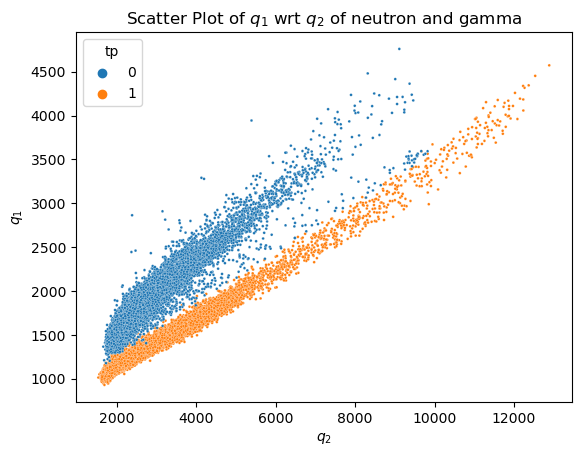

<Figure size 4000x4000 with 0 Axes>

In [7]:
sns.scatterplot(data=df, x='q2', y='q1',hue='tp',s=4)
plt.title(r'Scatter Plot of $q_1$ wrt $q_2$ of neutron and gamma')
plt.xlabel(r'$q_2$')
plt.ylabel(r'$q_1$')

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(40)

# Show plot
plt.show()

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
# Importing train test split to split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)

# Importing logistic regression lib from sklearn logistic reg
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

# Searching for parameters which are best for logistic regression to function on the given model
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,y_train)

# Print best prams for regression 
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


C:\Users\Sid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErro

In [9]:
# Accuracy on training set 
print(classifier_regressor.best_score_)

0.9979824446482379


In [10]:
y_pred=classifier_regressor.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred,y_test)
print(score)

0.9981912969464837


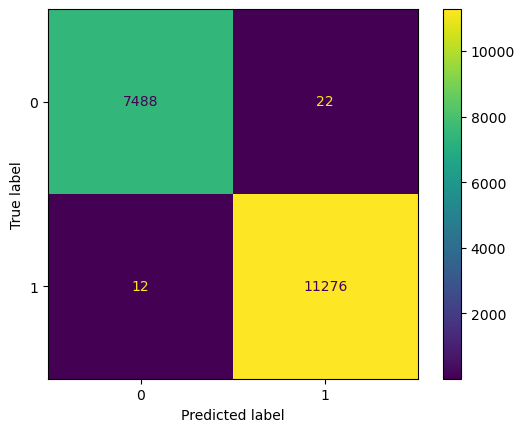

In [11]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Showing results when model is applied to test data
cm_display = ConfusionMatrixDisplay(cm).plot()

0.9980317055005852


In [12]:
testdf2= pd.read_csv('OneDrive/Documents/Karm/Processed2.csv')

In [13]:
Xr=testdf2.iloc[:,:-1]
yr=testdf2.iloc[:,-1]
Xr

,tconst,total,tail
0,8,3981,1712
1,9,2185,1242
2,9,1872,1127
3,8,3211,1574
4,8,2741,1353
...,...,...,...
49995,9,3422,1618
49996,8,2757,1406
49997,8,2176,1237
49998,9,2116,1206


In [14]:
yr_pred=classifier_regressor.predict(Xr)

In [15]:
score=accuracy_score(yr_pred,yr)
print(score)

0.0896


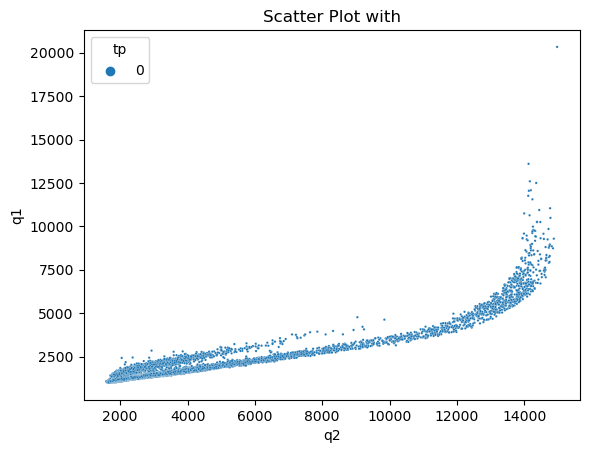

<Figure size 4000x4000 with 0 Axes>

In [17]:
sns.scatterplot(data=testdf2, x='total', y='tail',hue='tp',s=3)
plt.title('Scatter Plot with')
plt.xlabel('q2')
plt.ylabel('q1')

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(40)

# Show plot
plt.show()